# Import Parser

In [1]:
import swda
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

import seaborn as sns
sns.set()

In [2]:
corpus = swda.CorpusReader('swda')

# Looking at a single transcript
This section just simply looks at a transcript and to see how the feautres (words) and labels can be extracted.

In [3]:
from swda import Transcript

trans = Transcript('swda/sw00utt/sw_0001_4325.utt.csv', 'swda/swda-metadata.csv')

### label

In [4]:
trans.utterances[2].act_tag

'qy^d'

### word features

In [5]:
trans.utterances[3].pos_words()

['What',
 'kind',
 'of',
 'experience',
 'do',
 'you',
 ',',
 'do',
 'you',
 'have',
 ',',
 'then',
 'with',
 'child',
 'care',
 '?']

# Construct a Dataframe
The data is small enough to hold in memory so we build a dataframe out of it to make EDA and other tasks simpler. The model building doesn't need to use the dataframe necessarily, but it's to extract a series from the dataframe later.

In [6]:
def build_dataframe(data):
    df = pd.DataFrame(data, columns=["utterance"])
    df["conversation_no"] = df["utterance"].apply(lambda x: x.conversation_no)
    df["transcript_index"] = df["utterance"].apply(lambda x: x.transcript_index)
    df["act_tag"] = df["utterance"].apply(lambda x: x.act_tag)
    df["caller"] = df["utterance"].apply(lambda x: x.caller)
    df["utterance_index"] = df["utterance"].apply(lambda x: x.utterance_index)
    df["subutterance_index"] = df["utterance"].apply(lambda x: x.subutterance_index)
    df["words"] = df["utterance"].apply(lambda x: x.pos_words())
    df["act_tag"] = df["utterance"].apply(lambda x: x.act_tag)
    df["damsl_act_tag"] = df["utterance"].apply(lambda x: x.damsl_act_tag())
    
    df.drop(["utterance"], axis=1, inplace=True)
    
    return df

In [7]:
data = [x for x in corpus.iter_utterances()]

In [8]:
df = build_dataframe(data)
df

conversation_no  transcript_index act_tag caller  utterance_index  \
0                  3774                 0      sd      A                1   
1                  3774                 1       b      B                2   
2                  3774                 2      sv      A                3   
3                  3774                 3       b      B                4   
4                  3774                 4       +      A                5   
...                 ...               ...     ...    ...              ...   
221611             2963               230      fc      A              151   
221612             2963               231      fc      B              152   
221613             2963               232      fc      A              153   
221614             2963               233      fc      B              154   
221615             2963               234      fc      A              155   

        subutterance_index                                              words  \
0                        1  [So, I, 've, been, concerned, about, crime, la...   
1                        1                                        [Uh-huh, .]   
2                        1  [Uh, ,, it, 's, really, scary, to, listen, to,...   
3                        1                                        [Uh-huh, .]   
4                        1       [--, to, hear, about, all, the, problems, .]   
...                    ...                                                ...   
221611                   1                                    [All, right, .]   
221612                   1                    [Good, luck, in, everything, .]   
221613                   1                       [All, right, ,, you, too, .]   
221614                   1                                       [Bye-bye, .]   
221615                   1                                       [Bye-bye, .]   

       damsl_act_tag  
0                 sd  
1                  b  
2                 sv  
3                  b  
4                  +  
...              ...  
221611            fc  
221612            fc  
221613            fc  
221614            fc  
221615            fc  

[221616 rows x 8 columns]

In [9]:
" ".join(df.words.head()[2])

"Uh , it 's really scary to listen to the news every night and --"

# Train, Test Split
This is to split out the training examples in the same manner previous papers had done. Although, previous papers mention 19 conversations were used with 4000 utterances. It is important to split on the transcript rather than utterance because splitting transcripts up causes the context to be lost. I found the following set of indexes from the short-text-classification repository:

swda_test_set_idx = {'sw2121', 'sw2131', 'sw2151', 'sw2229', 'sw2335', 'sw2434', 'sw2441', 'sw2461',
                'sw2503', 'sw2632', 'sw2724', 'sw2752', 'sw2753', 'sw2836', 'sw2838', 'sw3528',
                'sw3756', 'sw3942', 'sw3994'} # 19
                
2121
2131
2151
2229
2335
2434
2441
2461
2503
2632
2724
2752
2753
2836
2838
3528
3756
3942
3994

In [10]:
test_indices = [2121, 2131, 2151, 2229, 2335, 2434, 2441, 2461, 2503, 2632, 2724, 2752, 2753, 2836, 2838, 3528, 3756, 3942, 3994]

In [11]:
test_df = df[df['conversation_no'].isin(test_indices)]
train_df = df[~df['conversation_no'].isin(test_indices)]

# DAMSL Tag EDA
I think we need to look into the tags and figure out what the mean and whether they are relevant. For example, the 'x' tag means Non-verbal, while a '+' means the speaker was interrupted from their previous sentence and '%' is uninterpretable.

In [12]:
train_df[train_df['act_tag'] == "x"]

conversation_no  transcript_index act_tag caller  utterance_index  \
9                  3774                 9       x      A                9   
15                 3774                15       x      A               11   
45                 3774                46       x      B               34   
47                 3774                48       x      B               36   
73                 3774                78       x      A               55   
...                 ...               ...     ...    ...              ...   
221524             2963               141       x      A               91   
221526             2963               143       x      A               93   
221528             2963               145       x      A               95   
221534             2963               151       x      A               99   
221551             2963               170       x      A              113   

        subutterance_index words damsl_act_tag  
9                        1    []             x  
15                       2   [.]             x  
45                       1    []             x  
47                       1    []             x  
73                       1    []             x  
...                    ...   ...           ...  
221524                   1    []             x  
221526                   1    []             x  
221528                   1    []             x  
221534                   1    []             x  
221551                   1    []             x  

[3536 rows x 8 columns]

In [13]:
train_df[train_df['act_tag'] == "+"]

conversation_no  transcript_index act_tag caller  utterance_index  \
4                  3774                 4       +      A                5   
25                 3774                25       +      A               17   
28                 3774                28       +      A               19   
31                 3774                31       +      A               21   
33                 3774                33       +      A               23   
...                 ...               ...     ...    ...              ...   
221543             2963               160       +      B              106   
221545             2963               164       +      A              109   
221561             2963               180       +      B              120   
221590             2963               209       +      B              138   
221591             2963               210       +      A              139   

        subutterance_index                                              words  \
4                        1       [--, to, hear, about, all, the, problems, .]   
25                       1  [--, so, we, 've, been, trying, to, install, s...   
28                       1  [--, we, put, up, a, fence, in, the, backyard, .]   
31                       1                    [--, playing, in, the, yard, .]   
33                       1                                     [You, know, .]   
...                    ...                                                ...   
221543                   1                                    [--, to, do, .]   
221545                   1                    [just, about, a, foot, deep, .]   
221561                   1  [--, bringing, something, for, a, potluck, pic...   
221590                   1                                      [had, our, ,]   
221591                   1  [the, reason, ,, that, is, the, reason, I, do,...   

       damsl_act_tag  
4                  +  
25                 +  
28                 +  
31                 +  
33                 +  
...              ...  
221543             +  
221545             +  
221561             +  
221590             +  
221591             +  

[17496 rows x 8 columns]

In [14]:
train_df[train_df['act_tag'] == "%"]

conversation_no  transcript_index act_tag caller  utterance_index  \
10                 3774                10       %      B               10   
13                 3774                13       %      B               10   
50                 3774                52       %      A               39   
58                 3774                61       %      B               44   
61                 3774                66       %      B               48   
...                 ...               ...     ...    ...              ...   
221558             2963               177       %      A              117   
221562             2963               181       %      B              120   
221563             2963               182       %      B              120   
221570             2963               189       %      B              124   
221601             2963               220       %      B              144   

        subutterance_index                   words damsl_act_tag  
10                       1   [I, 'm, not, real, ,]             %  
13                       4                [so, --]             %  
50                       2                [and, ,]             %  
58                       2                [so, --]             %  
61                       2                 [so, ,]             %  
...                    ...                     ...           ...  
221558                   1      [That, 's, the, ,]             %  
221562                   2  [and, oh, ,, grand, ,]             %  
221563                   3               [yeah, .]             %  
221570                   1            [I, hope, ,]             %  
221601                   2    [That, is, ,, uh, ,]             %  

[15190 rows x 8 columns]

As can be seen in the plot below, the tags sd, b, sv, +, % and aa are by far the most common ones. sd, short for Statement-non-opinion, is around 35% of all utterances and could potentially be seen as a baseline accuracy where the most popular act tag is used as a guess.

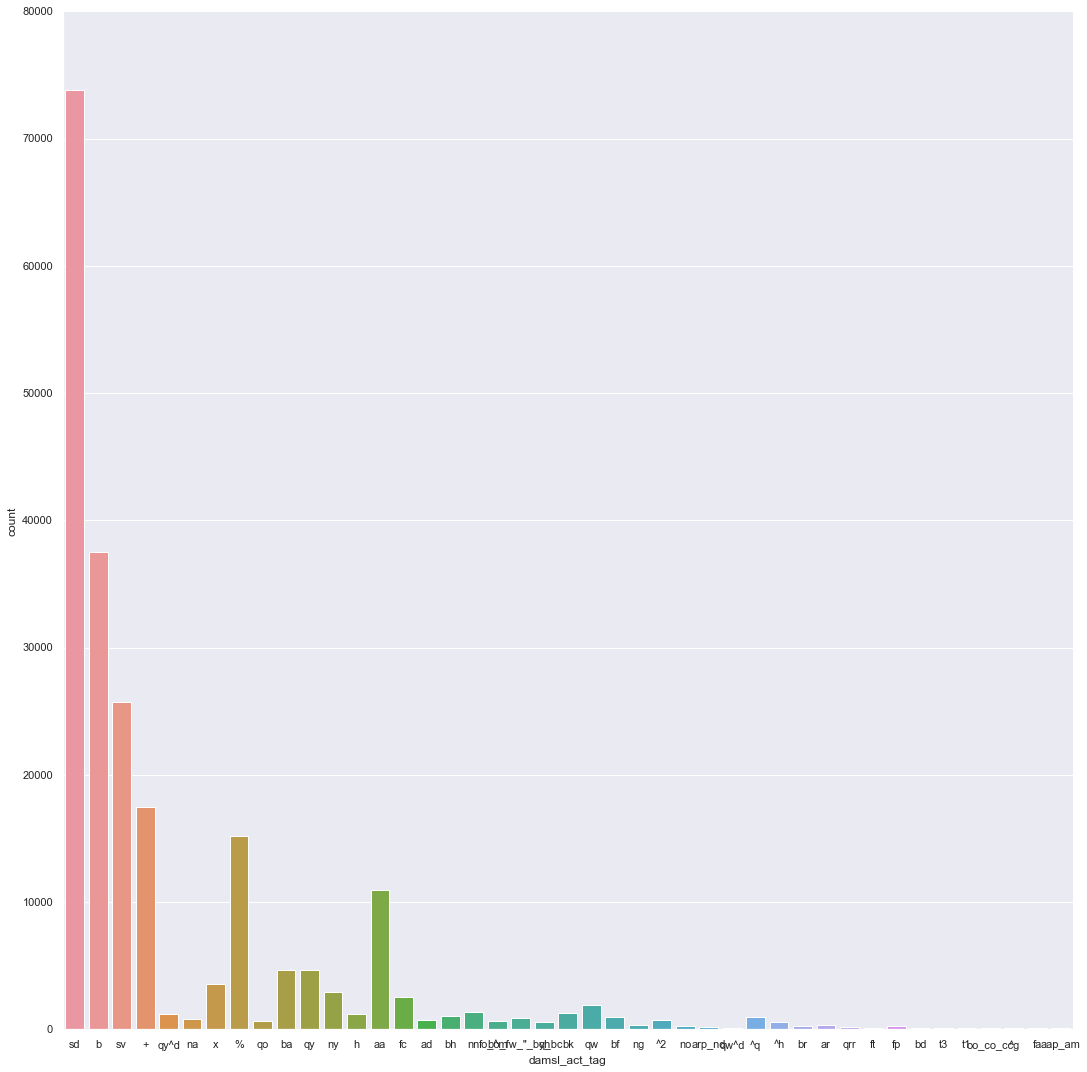

In [15]:
sns.catplot('damsl_act_tag', data=train_df, kind="count", height=15)

If the table below is examined further it can be seen that certain acts happen very rarely.

In [16]:
train_df.groupby('damsl_act_tag', sort=True).count().reset_index().sort_values('conversation_no', ascending=False)

damsl_act_tag  conversation_no  transcript_index  act_tag  caller  \
38               sd            73826             73826    73826   73826   
11                b            37533             37533    37533   37533   
39               sv            25708             25708    25708   25708   
1                 +            17496             17496    17496   17496   
0                 %            15190             15190    15190   15190   
6                aa            10925             10925    10925   10925   
13               ba             4688              4688     4688    4688   
36               qy             4642              4642     4642    4642   
42                x             3536              3536     3536    3536   
29               ny             2961              2961     2961    2961   
20               fc             2501              2501     2501    2501   
34               qw             1924              1924     1924    1924   
27               nn             1351              1351     1351    1351   
17               bk             1278              1278     1278    1278   
24                h             1203              1203     1203    1203   
37             qy^d             1182              1182     1182    1182   
16               bh             1032              1032     1032    1032   
5                ^q              966               966      966     966   
15               bf              929               929      929     929   
21  fo_o_fw_"_by_bc              867               867      867     867   
25               na              837               837      837     837   
8                ad              719               719      719     719   
2                ^2              704               704      704     704   
12              b^m              667               667      667     667   
32               qo              640               640      640     640   
31               qh              563               563      563     563   
4                ^h              549               549      549     549   
9                ar              342               342      342     342   
26               ng              296               296      296     296   
18               br              289               289      289     289   
28               no              279               279      279     279   
22               fp              220               220      220     220   
33              qrr              207               207      207     207   
10           arp_nd              204               204      204     204   
41               t3              117               117      117     117   
30         oo_co_cc              110               110      110     110   
14               bd              102               102      102     102   
40               t1              102               102      102     102   
7            aap_am               98                98       98      98   
3                ^g               92                92       92      92   
35             qw^d               79                79       79      79   
19               fa               77                77       77      77   
23               ft               71                71       71      71   

    utterance_index  subutterance_index  words  
38            73826               73826  73826  
11            37533               37533  37533  
39            25708               25708  25708  
1             17496               17496  17496  
0             15190               15190  15190  
6             10925               10925  10925  
13             4688                4688   4688  
36             4642                4642   4642  
42             3536                3536   3536  
29             2961                2961   2961  
20             2501                2501   2501  
34             1924                1924   1924  
27             1351                1351   1351  
17             1278

# Embeddings
The sentences need to be transformed into some form of embedding. This can be a word embedding, sentence embedding or perhaps even a concatenation of a few sentences to provide greater context - this third suggestions isn't well understood. For word embeddings, FastText and ELMo are first considered because they are simplest to use as they support out of voabulary words. Beyond this, BERT, USE, InferSent and others may be considered.

## FastText
To install FastText

In [193]:
import fasttext
model = fasttext.load_model('/Users/npflaum/Downloads/cc.en.300.bin')

In [999]:
model["wndfviyb"]

array([-7.69515475e-03, -2.17543952e-02, -4.46458813e-03,  3.19032669e-02,
       -5.01983427e-03, -1.75452195e-02, -4.29858733e-03,  5.22683002e-03,
        8.00217240e-05,  3.13781463e-02,  1.40790036e-02, -9.41690872e-04,
       -2.96369009e-03, -1.22767799e-02,  4.82237525e-03, -1.39441472e-02,
       -5.44182491e-03, -1.45225786e-02, -6.13526627e-03,  6.25555404e-03,
       -1.85429193e-02,  6.10710587e-03,  9.33107920e-03, -3.82428197e-03,
        3.52556147e-02,  1.56148020e-02, -1.89108029e-02,  1.40639311e-02,
       -6.50539622e-03,  4.85571586e-02,  8.76854919e-03,  1.39197223e-02,
        1.55330217e-02,  1.12169227e-02,  2.55379304e-02, -2.38299482e-02,
       -2.10441332e-02,  1.86671279e-02,  4.11426416e-03,  1.37934126e-02,
        1.18739158e-03, -9.63583961e-03, -1.30163822e-02,  9.40598641e-03,
       -3.08920052e-02,  1.42465520e-03, -3.86710130e-02,  3.05463057e-02,
        2.71018334e-02, -1.68640143e-03, -6.10686978e-03, -2.20249742e-02,
        3.98017094e-03, -

## Elmo

In [19]:
import tensorflow as tf
import tensorflow_hub as hub
# import tensorflow_text
url = "https://tfhub.dev/google/elmo/3"
embed = hub.Module(url, trainable=False)


In [20]:
df.words.apply(lambda x: " ".join(x))

0              So I 've been concerned about crime lately .
1                                                  Uh-huh .
2         Uh , it 's really scary to listen to the news ...
3                                                  Uh-huh .
4                       -- to hear about all the problems .
                                ...                        
221611                                          All right .
221612                            Good luck in everything .
221613                                All right , you too .
221614                                            Bye-bye .
221615                                            Bye-bye .
Name: words, Length: 221616, dtype: object

In [23]:
a = embed(df.words.apply(lambda x: " ".join(x))[0:100])
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    a = a.eval()

print(a)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


[[-0.5456306  -0.08927573  0.08165528 ... -0.39866358  0.2687846
   0.02431358]
 [-0.38180643 -0.48907223 -0.18999936 ... -0.07128669  0.05172316
   0.11867607]
 [ 0.00579592 -0.19578825  0.02852433 ... -0.10754362  0.04977345
   0.08113027]
 ...
 [-0.0102094  -0.0578916   0.07909935 ... -0.02685988  0.31140137
  -0.02411919]
 [-0.38180643 -0.48907223 -0.18999936 ... -0.07128669  0.05172316
   0.11867607]
 [-0.30296308 -0.04853232  0.15522003 ... -0.15181036  0.3438128
   0.27287847]]


In [22]:
!pip list

Package                            Version  
---------------------------------- ---------
absl-py                            0.9.0    
alabaster                          0.7.12   
anaconda-client                    1.7.2    
anaconda-navigator                 1.9.7    
anaconda-project                   0.8.3    
appnope                            0.1.0    
appscript                          1.0.1    
asn1crypto                         1.0.1    
astor                              0.8.1    
astroid                            2.3.1    
astropy                            3.2.2    
atomicwrites                       1.3.0    
attrs                              19.2.0   
Babel                              2.7.0    
backcall                           0.1.0    
backports.functools-lru-cache      1.5      
backports.os                       0.1.1    
backports.shutil-get-terminal-size 1.0.0    
backports.tempfile                 1.0      
backports.weakref                  1.0.post1
beautifuls

# Model 1: Basic LSTM

In [982]:
sample = df[0:1000]
filtered_sample = sample[sample.words.astype(bool)]
len(filtered_sample)

983

In [988]:
from sklearn import preprocessing

x_train = filtered_sample.words.values
x_train = np.array([np.mean([model[word] for word in sentence],axis=0).reshape(1,-1) for sentence in x_train])

le = preprocessing.LabelEncoder()
le.fit(df.damsl_act_tag)
y_train = le.transform(filtered_sample.damsl_act_tag)
y_train = keras.utils.to_categorical(y_train, num_classes = 43)

In [998]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [989]:
lstm_model = Sequential()
lstm_model.add(LSTM(12, dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(Dense(43, activation='softmax'))

lstm_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

lstm_model.fit(np.array(x_train), y_train,
          batch_size=2,
          epochs=15)

Epoch 1/15
983/983 [==============================] - 2s 3ms/step - loss: 2.5833 - accuracy: 0.4496
Epoch 2/15
983/983 [==============================] - 2s 2ms/step - loss: 1.7842 - accuracy: 0.4781: 0s
Epoch 3/15
983/983 [==============================] - 2s 2ms/step - loss: 1.6611 - accuracy: 0.4903
Epoch 4/15
983/983 [==============================] - 2s 2ms/step - loss: 1.5728 - accuracy: 0.5046
Epoch 5/15
983/983 [==============================] - 2s 2ms/step - loss: 1.5061 - accuracy: 0.5188
Epoch 6/15
983/983 [==============================] - 2s 2ms/step - loss: 1.4432 - accuracy: 0.5514
Epoch 7/15
983/983 [==============================] - 1s 1ms/step - loss: 1.3947 - accuracy: 0.5656
Epoch 8/15
983/983 [==============================] - 2s 2ms/step - loss: 1.3585 - accuracy: 0.5727
Epoch 9/15
983/983 [==============================] - 2s 2ms/step - loss: 1.3175 - accuracy: 0.5839
Epoch 10/15
983/983 [==============================] - 2s 2ms/step - loss: 1.2871 - accuracy: 0.

In [990]:
lstm_model.summary()

Model: "sequential_79"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_64 (LSTM)               (None, 12)                15024     
_________________________________________________________________
dense_72 (Dense)             (None, 43)                559       
Total params: 15,583
Trainable params: 15,583
Non-trainable params: 0
_________________________________________________________________


# Model 2: BiDirectional LSTM

In [997]:
from keras.layers import Bidirectional
lstm_model = Sequential()
lstm_model.add(Bidirectional(LSTM(12, dropout=0.2, recurrent_dropout=0.2)))
lstm_model.add(Dense(43, activation='softmax'))

lstm_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

lstm_model.fit(np.array(x_train), y_train,
          batch_size=2,
          epochs=15)

Epoch 1/15
983/983 [==============================] - 3s 4ms/step - loss: 2.3618 - accuracy: 0.4323
Epoch 2/15
983/983 [==============================] - 2s 2ms/step - loss: 1.6739 - accuracy: 0.4812
Epoch 3/15
983/983 [==============================] - 2s 2ms/step - loss: 1.5123 - accuracy: 0.5198
Epoch 4/15
983/983 [==============================] - 2s 2ms/step - loss: 1.4125 - accuracy: 0.5483
Epoch 5/15
983/983 [==============================] - 2s 2ms/step - loss: 1.3453 - accuracy: 0.5697
Epoch 6/15
983/983 [==============================] - 2s 2ms/step - loss: 1.2863 - accuracy: 0.5890
Epoch 7/15
983/983 [==============================] - 2s 2ms/step - loss: 1.2362 - accuracy: 0.6094
Epoch 8/15
983/983 [==============================] - 2s 2ms/step - loss: 1.1948 - accuracy: 0.6226
Epoch 9/15
983/983 [==============================] - 2s 2ms/step - loss: 1.1696 - accuracy: 0.6144
Epoch 10/15
983/983 [==============================] - 2s 2ms/step - loss: 1.1422 - accuracy: 0.6256

In [313]:
new_train

array([list([-0.002574818441644311, -0.017653219401836395, 0.0446745790541172, -0.015189293771982193, -0.0820840373635292, -0.030671285465359688, -0.0245323795825243, -0.027356602251529694, -0.01847524754703045, -0.012772866524755955, 0.018007121980190277, -0.02016860991716385, -0.00011199360596947372, 0.0026287822984158993, 0.024096740409731865, 0.06510727852582932, 0.0056140488013625145, -0.005315517541021109, -0.053928401321172714, 0.009880856610834599, 0.056597139686346054, 0.03191881999373436, -0.012695234268903732, -0.13558141887187958, -0.030958984047174454, -0.06870324164628983, -0.018812021240592003, 0.037749771028757095, -0.004774173256009817, 0.14815130829811096, -0.017244087532162666, -0.018592240288853645, -0.06090150400996208, 0.031346313655376434, 0.019047042354941368, -0.05051325261592865, 0.09195643663406372, -0.08151505887508392, -0.01704816333949566, -0.02481968142092228, -0.02254224382340908, 0.009176438674330711, -0.07185813039541245, 0.11953464150428772, 0.1660188

In [223]:
x_train = df.words[0:500].apply(lambda x: np.array([model[y] for y in x]))
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df.damsl_act_tag)
y_train = le.transform(df.damsl_act_tag[0:500])

In [978]:
y_train = keras.utils.to_categorical(y_train, num_classes = 43)[0]

In [218]:
x_train[0][0]

-0.0025748184

In [160]:
x_train_values = x_train.values.reshape(-1, 500)
x_train_values

array([[array([-2.57481844e-03, -1.76532194e-02,  4.46745791e-02, -1.51892938e-02,
       -8.20840374e-02, -3.06712855e-02, -2.45323796e-02, -2.73566023e-02,
       -1.84752475e-02, -1.27728665e-02,  1.80071220e-02, -2.01686099e-02,
       -1.11993606e-04,  2.62878230e-03,  2.40967404e-02,  6.51072785e-02,
        5.61404880e-03, -5.31551754e-03, -5.39284013e-02,  9.88085661e-03,
        5.65971397e-02,  3.19188200e-02, -1.26952343e-02, -1.35581419e-01,
       -3.09589840e-02, -6.87032416e-02, -1.88120212e-02,  3.77497710e-02,
       -4.77417326e-03,  1.48151308e-01, -1.72440875e-02, -1.85922403e-02,
       -6.09015040e-02,  3.13463137e-02,  1.90470424e-02, -5.05132526e-02,
        9.19564366e-02, -8.15150589e-02, -1.70481633e-02, -2.48196814e-02,
       -2.25422438e-02,  9.17643867e-03, -7.18581304e-02,  1.19534642e-01,
        1.66018859e-01, -2.42643710e-02,  2.46965699e-02,  7.65613317e-02,
       -1.15803378e-02,  1.39466487e-02,  1.08283907e-02, -2.03997586e-02,
       -2.0139046

In [169]:
x_train_values.reshape(500,1)

array([[array([-2.57481844e-03, -1.76532194e-02,  4.46745791e-02, -1.51892938e-02,
       -8.20840374e-02, -3.06712855e-02, -2.45323796e-02, -2.73566023e-02,
       -1.84752475e-02, -1.27728665e-02,  1.80071220e-02, -2.01686099e-02,
       -1.11993606e-04,  2.62878230e-03,  2.40967404e-02,  6.51072785e-02,
        5.61404880e-03, -5.31551754e-03, -5.39284013e-02,  9.88085661e-03,
        5.65971397e-02,  3.19188200e-02, -1.26952343e-02, -1.35581419e-01,
       -3.09589840e-02, -6.87032416e-02, -1.88120212e-02,  3.77497710e-02,
       -4.77417326e-03,  1.48151308e-01, -1.72440875e-02, -1.85922403e-02,
       -6.09015040e-02,  3.13463137e-02,  1.90470424e-02, -5.05132526e-02,
        9.19564366e-02, -8.15150589e-02, -1.70481633e-02, -2.48196814e-02,
       -2.25422438e-02,  9.17643867e-03, -7.18581304e-02,  1.19534642e-01,
        1.66018859e-01, -2.42643710e-02,  2.46965699e-02,  7.65613317e-02,
       -1.15803378e-02,  1.39466487e-02,  1.08283907e-02, -2.03997586e-02,
       -2.0139046

In [43]:
import numpy as np
len(np.mean(embedded_words[1], axis=0))

300

In [172]:
y_train.reshape(500,1)

array([[38],
       [11],
       [39],
       [11],
       [ 1],
       [37],
       [25],
       [11],
       [38],
       [42],
       [ 0],
       [38],
       [38],
       [ 0],
       [11],
       [42],
       [38],
       [38],
       [38],
       [38],
       [11],
       [32],
       [38],
       [38],
       [11],
       [ 1],
       [38],
       [11],
       [ 1],
       [38],
       [11],
       [ 1],
       [11],
       [ 1],
       [11],
       [38],
       [13],
       [ 1],
       [11],
       [ 1],
       [11],
       [ 1],
       [38],
       [11],
       [ 1],
       [42],
       [ 1],
       [42],
       [ 1],
       [ 1],
       [ 0],
       [38],
       [38],
       [11],
       [38],
       [38],
       [11],
       [38],
       [ 0],
       [38],
       [11],
       [ 0],
       [38],
       [38],
       [39],
       [11],
       [ 1],
       [11],
       [11],
       [ 0],
       [38],
       [ 0],
       [38],
       [42],
       [ 1],
       [39],
       [11],

In [186]:
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding,GlobalAveragePooling1D, LSTM

lstm_model = Sequential()
# model.add(Embedding(10000, 300))
lstm_model.add(LSTM(3, return_sequences=True))
lstm_model.add(Dense(len(le.classes_), activation='softmax'))

lstm_model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

lstm_model.fit(x_train_values.reshape(500,1), y_train.reshape(-1,500), epochs=10)
# for layer in model.layers:
#     print(layer.output_shape)
# model.summary()

ValueError: Input 0 is incompatible with layer lstm_33: expected ndim=3, found ndim=2